In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import math
import seaborn as sns
import matplotlib.image as mpimg
from pyfonts import load_google_font
from highlight_text import fig_text

In [20]:
holmes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-11-18/holmes.csv")

In [21]:
holmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65958 entries, 0 to 65957
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   book      65958 non-null  object
 1   text      52610 non-null  object
 2   line_num  65958 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [22]:
holmes.head(2)

,book,text,line_num
0,A Study In Scarlet,A STUDY IN SCARLET,1
1,A Study In Scarlet,NaN,2


In [23]:
# Drop na in text
holmes = holmes.dropna(subset=["text"])

# Join text lines in each book
book_texts = holmes.groupby("book")["text"].apply(lambda x: " ".join(x)).reset_index()

In [24]:
# Filter for the relevant book
target_book = ["The Valley Of Fear"]
df = book_texts[book_texts["book"].isin(target_book)]

In [25]:
# Empty list
sentences = []

# Iterate over rows, tokenize text into sentences, add book name and sentence 
for i, row in df.iterrows():
    for sent in sent_tokenize(row["text"]):
        sentences.append({"book": row["book"], "sentence": sent})

sentences_df = pd.DataFrame(sentences)

In [26]:
# Boolean values for both names
sentences_df["mentions_holmes"] = sentences_df["sentence"].str.contains(r"Holmes", case=False)
sentences_df["mentions_watson"] = sentences_df["sentence"].str.contains(r"Watson", case=False)

In [27]:
# Convert boolean into integer
sentences_df["mentions_holmes"] = sentences_df["mentions_holmes"].astype(int)
sentences_df["mentions_watson"] = sentences_df["mentions_watson"].astype(int)

For creating a perfect square array, I followed [this](https://towardsdatascience.com/linguistic-fingerprinting-with-python-5b128ae7a9fc/) tutorial by Lee Vaughan.

In [28]:
len(sentences_df)

4269

The lenght of values is 4269, the largest perfect square less than or equal to 4269:

$\sqrt{4269}=65.34≈65$

65*65 square matrix required to be created.

In [29]:
# Reshape values into a square 2D array that fits a perfect square
def reshape_to_square(values):    
    # Calculate the largest perfect square 
    perfect_square = int(math.floor(math.sqrt(len(values)))) ** 2
    # Slice the values to match the size of the perfect square and reshape into arrays
    arr = np.array(values[:perfect_square]).reshape(
        int(math.sqrt(perfect_square)),
        int(math.sqrt(perfect_square))
    )
    return arr

# Arrays for both names 
holmes_arr = reshape_to_square(sentences_df["mentions_holmes"].tolist())
watson_arr = reshape_to_square(sentences_df["mentions_watson"].tolist())

In [30]:
# Load font
font = load_google_font("Poller One", weight="regular")
font2 = load_google_font("Dosis", weight="medium")

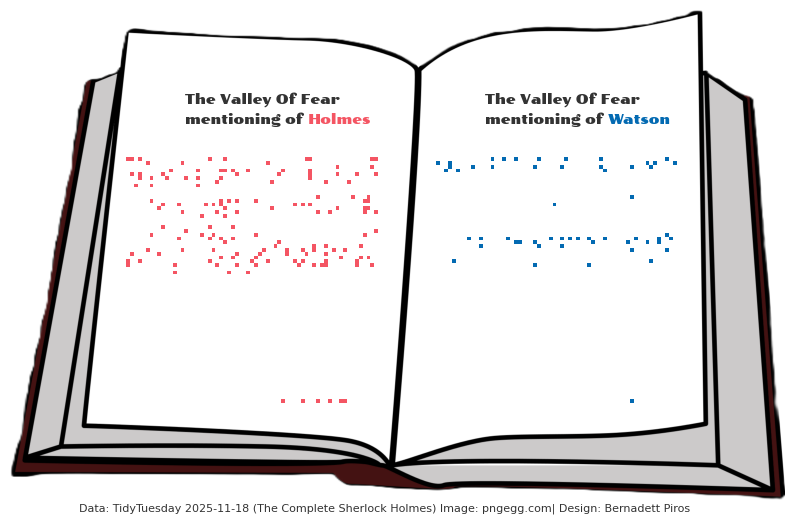

In [31]:
img = mpimg.imread("empty_book.png") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)
ax.axis("off")
child_ax1 = ax.inset_axes([0.15, 0.2, 0.325, 0.5])
child_ax2 = ax.inset_axes([0.55, 0.2, 0.325, 0.5])

# Heatmap for Holmes
sns.heatmap(
    holmes_arr,    
    cmap= ["white", "#F45563"],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    ax=child_ax1
)
fig_text(0.3, 0.7, s="The Valley Of Fear\nmentioning of <Holmes>", alpha=0.8, font=font, 
              highlight_textprops=[
                  {"color": "#F45563", "alpha":1}
                  ], fig=fig)

# Heatmap for Watson
sns.heatmap(
    watson_arr,    
    cmap = ["white", "#036AB2"],
    cbar=False,
    xticklabels=False,
    yticklabels=False,
    ax=child_ax2
)
fig_text(0.6, 0.7, s="The Valley Of Fear\nmentioning of <Watson>", alpha=0.8, font=font, 
        highlight_textprops=[
                  {"color": "#036AB2", "alpha":1}
                  ], fig=fig)

# Add caption
fig.text(0.5, 0.175, "Data: TidyTuesday 2025-11-18 (The Complete Sherlock Holmes) Image: pngegg.com| Design: Bernadett Piros", size=8, alpha=0.8, ha="center")

plt.show()

#fig.savefig("2025-11-18.png", bbox_inches='tight', pad_inches=0.2)